In [1]:
#Primer Examen Parcial
#Tematica del Dataset: Mantenimiento de Buques
#Datos del Dataset
     #filas= 11934
     #columnas=19
     #link del Dataset https://www.kaggle.com/datasets/thedevastator/improving-naval-vessel-condition-through-machine/data
#Nombre: Barja Coragua Erlinda
#carrera: Ing.de Sistemas
#Grupo de Laboratorio: Grupo 2
# REPOSITORIO https://github.com/Erlinda-Barja/INTELIGENCIA-ARTIFICIAL

In [2]:
#importando el dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Librerias Utilizadas
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy import optimize

In [4]:
# 1: Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.
data = pd.read_csv('/content/drive/MyDrive/1erParcial/data.csv')
columna = 'index'
data.drop(columna, axis=1, inplace=True)

# Definir los caracteres, texto, valores booleanos
categoria= ['P','C','M']# clases de buques pasajeros, carga, militar
color = ['black','Grey','White']
booleano= [True, False]

#Generación de datos aleatorios para la categoría, color, estado:
data['categoria_buques']=np.random.choice(categoria,len(data))
data['color_buques']=np.random.choice(color ,len(data))
data['estado_buques']=np.random.choice(booleano,len(data))

#Separar las palabras:
def keep_two_words(column_name):
    words = column_name.split()
    return ' '.join(words[:3])

# Aplicar la función a todos los nombres de columnas
data.columns = [keep_two_words(col) for col in data.columns]
data.columns = data.columns.str.replace(' ', '')
data.to_csv('buques.csv', index= False)

In [5]:
display (data)
print (data.info())

,Leverposition,Shipspeed(v),GasTurbine(GT),GTrateof,GasGeneratorrate,StarboardPropellerTorque,PortPropellerTorque,HightPressure(HP),GTCompressorinlet,GTCompressoroutlet,...,GTCompressorinlet,GTCompressoroutlet,GTexhaustgas,TurbineInjectonControl,Fuelflow(mf),GTCompressordecay,GTTurbinedecay,categoria_buques,color_buques,estado_buques
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,...,0.998,5.947,1.019,7.137,0.082,0.95,0.975,C,Grey,False
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,...,0.998,7.282,1.019,10.655,0.287,0.95,0.975,P,black,True
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,...,0.998,7.574,1.020,13.086,0.259,0.95,0.975,C,White,False
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,...,0.998,9.007,1.022,18.109,0.358,0.95,0.975,P,Grey,True
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,...,0.998,11.197,1.026,26.373,0.522,0.95,0.975,M,White,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,...,0.998,10.990,1.027,23.803,0.471,1.00,1.000,C,Grey,False
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,...,0.998,13.109,1.031,32.671,0.647,1.00,1.000,C,black,True
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,...,0.998,15.420,1.036,42.104,0.834,1.00,1.000,P,White,True
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,...,0.998,18.293,1.043,58.064,1.149,1.00,1.000,C,Grey,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Leverposition             11934 non-null  float64
 1   Shipspeed(v)              11934 non-null  int64  
 2   GasTurbine(GT)            11934 non-null  float64
 3   GTrateof                  11934 non-null  float64
 4   GasGeneratorrate          11934 non-null  float64
 5   StarboardPropellerTorque  11934 non-null  float64
 6   PortPropellerTorque       11934 non-null  float64
 7   HightPressure(HP)         11934 non-null  float64
 8   GTCompressorinlet         11934 non-null  int64  
 9   GTCompressoroutlet        11934 non-null  float64
 10  HPTurbineexit             11934 non-null  float64
 11  GTCompressorinlet         11934 non-null  float64
 12  GTCompressoroutlet        11934 non-null  float64
 13  GTexhaustgas              11934 non-null  float64
 14  Turbin

In [6]:
# 2: Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.
data = pd.read_csv('/content/buques.csv')
num_new_rows = len(data)#calcula el número total de filas

# Generar valores aleatorios para las nuevas columnas
new_data = pd.DataFrame({

    'Leverposition': np.random.choice(data['Leverposition'].unique(), num_new_rows),
    'Shipspeed(v)': np.random.choice(data['Shipspeed(v)'].unique(), num_new_rows),
    'GasTurbine(GT)': np.random.choice(data['GasTurbine(GT)'].unique(), num_new_rows),
    'GTrateof': np.random.choice(data['GTrateof'].unique(), num_new_rows),
    'GasGeneratorrate': np.random.choice(data['GasGeneratorrate'].unique(), num_new_rows),
    'StarboardPropellerTorque': np.random.choice(data['StarboardPropellerTorque'].unique(), num_new_rows),
    'PortPropellerTorque': np.random.choice(data['PortPropellerTorque'].unique(), num_new_rows),
    'HightPressure(HP)': np.random.choice(data['HightPressure(HP)'].unique(), num_new_rows),
    'GTCompressorinlet': np.random.choice(data['GTCompressorinlet'].unique(), num_new_rows),
    'GTCompressoroutlet': np.random.choice(data['GTCompressoroutlet'].unique(), num_new_rows),
    'HPTurbineexit': np.random.choice(data['HPTurbineexit'].unique(), num_new_rows),
    'GTCompressorinlet.1': np.random.choice(data['GTCompressorinlet.1'].unique(), num_new_rows),
    'GTCompressoroutlet.1': np.random.choice(data['GTCompressoroutlet.1'].unique(), num_new_rows),
    'GTexhaustgas': np.random.choice(data['GTexhaustgas'].unique(), num_new_rows),
    'TurbineInjectonControl': np.random.choice(data['TurbineInjectonControl'].unique(), num_new_rows),
    'Fuelflow(mf)': np.random.choice(data['Fuelflow(mf)'].unique(), num_new_rows),
    'GTCompressordecay': np.random.choice(data['GTCompressordecay'].unique(), num_new_rows),
    'GTTurbinedecay': np.random.choice(data['GTTurbinedecay'].unique(), num_new_rows),
    'categoria_buques': np.random.choice(data['categoria_buques'].unique(), num_new_rows),
    'color_buques': np.random.choice(data['color_buques'].unique(), num_new_rows),
    'estado_buques': np.random.choice(data['estado_buques'].unique(), num_new_rows)
})

# Concatenar los nuevos datos con los existentes
data = pd.concat([data, new_data], ignore_index=True)
data.to_csv('buques.csv', index=False)


In [7]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23868 entries, 0 to 23867
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Leverposition             23868 non-null  float64
 1   Shipspeed(v)              23868 non-null  int64  
 2   GasTurbine(GT)            23868 non-null  float64
 3   GTrateof                  23868 non-null  float64
 4   GasGeneratorrate          23868 non-null  float64
 5   StarboardPropellerTorque  23868 non-null  float64
 6   PortPropellerTorque       23868 non-null  float64
 7   HightPressure(HP)         23868 non-null  float64
 8   GTCompressorinlet         23868 non-null  int64  
 9   GTCompressoroutlet        23868 non-null  float64
 10  HPTurbineexit             23868 non-null  float64
 11  GTCompressorinlet.1       23868 non-null  float64
 12  GTCompressoroutlet.1      23868 non-null  float64
 13  GTexhaustgas              23868 non-null  float64
 14  Turbin

In [8]:
#3: Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.

X= data.iloc[:, :20]#Seleccionar las primeras 20 columnas del DataFrame:
y= data.iloc[:, 20]#Seleccionar la columna 20 del DataFrame:
m= y.size#Obtener el tamaño (número de elementos) de

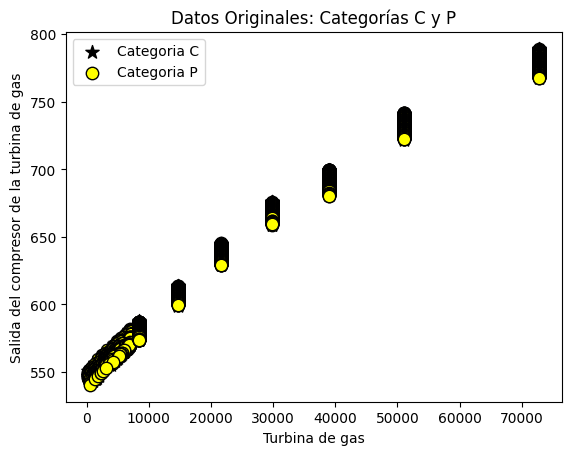

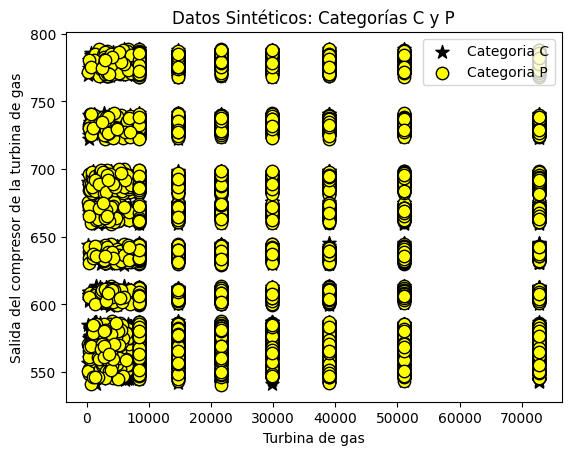

In [9]:
#Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.
# Cargar el dataset
data = pd.read_csv('buques.csv')

# Número de filas originales (asumiendo que duplicaste los datos)
num_new_rows = len(data) // 2

# Extraer los datos originales y los sintéticos
data_original = data.iloc[:num_new_rows]
data_sintetico = data.iloc[num_new_rows:]

# Función para graficar dos categorías específicas usando posiciones de columnas
def plotData(df, title):
    # Filtrar las dos categorías específicas
    cat1 = df.iloc[:, 18] == 'C'
    cat2 = df.iloc[:, 18] == 'P'

    # Graficar la primera categoría
    pyplot.scatter(df.loc[cat1].iloc[:, 2], df.loc[cat1].iloc[:, 9],
                marker='*', c='black', label='Categoria C', s=100)

    # Graficar la segunda categoría
    pyplot.scatter(df.loc[cat2].iloc[:, 2], df.loc[cat2].iloc[:, 9],
                marker='o', c='yellow', edgecolor='black', label='Categoria P', s=80)

    # Etiquetas y título
    pyplot.xlabel('Turbina de gas')
    pyplot.ylabel('Salida del compresor de la turbina de gas')
    pyplot.title(title)
    pyplot.legend()
    pyplot.show()

# Graficar los datos originales para las categorías 'M' y 'P'
plotData(data_original, 'Datos Originales: Categorías C y P')

# Graficar los datos sintéticos para las categorías 'M' y 'P'
plotData(data_sintetico,  'Datos Sintéticos: Categorías C y P')


In [10]:
# 4: Dividir los datos del dataset sintético en datos de entrenamiento y prueba
data2 = pd.read_csv('/content/buques.csv')

#variables categoricas
columnas_categoricas = data2.select_dtypes(include=['object','bool']).columns

#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()#transformar variables categóricas en valores numéricos
  data2[columna] = le.fit_transform(data2[columna])

X= data2.iloc[:, :20]
y= data2.iloc[:, 18]
m= y.size

#Dividir el conjunto de datos en entrenamiento y prueba:
X_train, X_test = train_test_split(data2, test_size=0.2, random_state=42)
X_train.to_csv("entrenamiento.csv", index=False)
X_test.to_csv("prueba.csv", index=False)


In [11]:
#6.Entrenar un modelo One-vs-All para reemplazar el modelo desarrollado en los puntos 5 y 6.
def sigmoid(z):
     z = np.clip(z, -500, 500)#limitar los valores de z
     return 1 / (1 + np.exp(-z))

def featureNormalizes(X):

    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)
    mu = X.mean(axis=0)#se calcula la media por cada columna. 0=filas
    sigma = X.std(axis=0)#Calcula la desviación estándar de cada columna
    X_norm = (X - mu) / sigma
    if isinstance(X, np.ndarray):
        X_norm = X_norm.values #Convertir de vuelta
#X_norm: Los datos normalizados.
#mu: La media de cada columna (característica).
#sigma: La desviación estándar de cada columna.
    return X_norm, mu, sigma

# Normalizar los datos
X_train, mu, sigma = featureNormalizes(X_train)

# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape #m=filas, n= columnas
X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)


In [12]:
#funcion de costo
def lrCostFunction(theta, X, y, lambda_):

    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(X @ theta)
    h = np.clip(h, 1e-10, 1 - 1e-10)

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad

def gradientDescent(X, y, theta, alpha, num_iters, lambda_):
    J_history = []

    for i in range(num_iters):
        J, grad = lrCostFunction(theta, X, y, lambda_)
        theta = theta - alpha * grad
        J_history.append(J)

    return theta, J_history

def oneVsAll(X, y, num_labels, lambda_):

    # algunas variables utiles
    m, n = X.shape

    # print(m, n)
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)
        # print(res)
        all_theta[c] = res.x

    return all_theta

def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    return np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)

In [13]:
 #7 Se debe visualizar de manera obligatorio graficas que muestren el costo y la precisión en relación a los epochs de entrenamiento.
#8: Se debe utilizar el dataset de entrenamiento para entrenar los pesos de los modelos desarrollados.
#9: Se debe utilizar el dataset de prueba para determinar la efectividad de los modelos desarrollados.
 #10 De debe utilizar código con funciones básicas y construidas todas a partir de la librería numpy. Es decir, no se puede utilizar ninguna otra librería para la construcción de los modelos.

import pandas as pd


train_data = pd.read_csv('/content/entrenamiento.csv')
test_data = pd.read_csv('/content/prueba.csv')

# Seleccionar características (columnas de la 0 a la 19) y la etiqueta (columna 18) del conjunto de entrenamiento
X_train = train_data.iloc[:, :20].values
y_train = train_data.iloc[:, 20].values

# Seleccionar características y etiquetas del conjunto de prueba
X_test = test_data.iloc[:, :20].values
y_test = test_data.iloc[:, 20].values




Precisión en conjunto de entrenamiento: 51.30%
Precisión en conjunto de prueba: 51.09%
Costo final para clase 0: 11.29948991620294
Costo final para clase 1: 11.29948974423441
Costo final para clase 2: 2.1149414852597967e-05


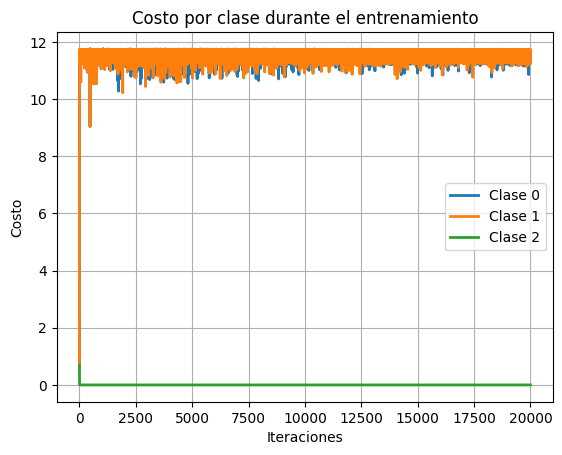

In [14]:
lambda_ = 0.1  # Regularización
alpha = 0.0002
num_iters = 20000
num_labels = 3 # Número de clases

# Entrenar el modelo One-vs-All
all_theta = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predicciones en el conjunto de prueba
pred_train = predictOneVsAll(all_theta, X_train)
pred_test = predictOneVsAll(all_theta, X_test)
train_accuracy = np.mean(pred_train == y_train) * 100
test_accuracy = np.mean(pred_test == y_test) * 100

print(f'Precisión en conjunto de entrenamiento: {train_accuracy:.2f}%')
print(f'Precisión en conjunto de prueba: {test_accuracy:.2f}%')

# Graficar el costo durante el entrenamiento
def plotCost(J_history):
    plt.plot(np.arange(len(J_history)), J_history, lw=2)
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    plt.title('Costo durante el entrenamiento')
    plt.show()

# Entrenamiento con registro del costo
import matplotlib.pyplot as plt
def oneVsAllWithCost(X, y, num_labels, lambda_, alpha, num_iters):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    all_J_history = []

    # Agregar columna de unos a X (intercepto)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)
        y_c = np.where(y == c, 1, 0)  # Etiqueta binaria para la clase c
        theta, J_history = gradientDescent(X, y_c, initial_theta, alpha, num_iters, lambda_)
        all_theta[c] = theta
        all_J_history.append(J_history)

    return all_theta, all_J_history

# Entrenar y capturar el costo durante el entrenamiento
all_theta, all_J_history = oneVsAllWithCost(X_train, y_train, num_labels, lambda_, alpha, num_iters)

# informar de entrenamiento de cada clase empezando por la 1 hasta la 3
for i, J_history in enumerate(all_J_history):
    print(f'Costo final para clase {i}: {J_history[-1]}')


# Graficar los costos para todas las clases
for i, J_history in enumerate(all_J_history):
    plt.plot(np.arange(len(J_history)), J_history, label=f'Clase {i}',lw=2)

plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Costo por clase durante el entrenamiento')
plt.legend()
plt.grid(True)

plt.show()